In [11]:
import numpy as np     #imported all library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import graphviz

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/vis2208/Air-Pollution-/main/Processed_data.csv")   #read data
df.head(5)

,Date,PM2.5,PM10,NO2,SO2,CO,RH,WS,WD,SR,AT
0,03/01/2018,287.71,488.92,86.46,20.49,1.82,67.28,0.32,248.70,167.41,12.41
1,15/01/2018,240.96,515.83,101.49,20.95,1.84,50.45,0.71,264.26,169.86,15.98
2,17/01/2018,294.38,402.21,72.23,17.61,1.20,64.78,1.19,88.52,166.50,14.02
3,23/01/2018,196.40,322.72,86.80,24.86,2.09,61.87,1.82,114.02,149.21,14.05
4,24/01/2018,162.97,239.81,72.06,25.29,2.08,66.09,0.71,240.56,198.31,13.42


In [13]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size = 0.8

X = df.drop(columns = ['PM2.5','Date']).copy()
y = df['PM2.5']

# In the first step we will split the data in training and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2581, 9)
(2581,)
(646, 9)
(646,)


In [14]:
X_valid  # due to random_state = 10 , always same data otherwise different data on each run

,PM10,NO2,SO2,CO,RH,WS,WD,SR,AT
2572,164.79,31.08,13.26,0.77,46.93,0.98,131.43,214.99000,30.26
187,118.20,40.60,7.77,1.64,47.24,1.81,105.76,215.89000,35.03
1539,96.75,20.50,12.69,2.80,84.64,1.22,235.70,115.50000,30.29
2323,64.38,22.91,4.17,1.57,87.04,0.85,212.33,127.10000,26.92
2971,69.12,23.58,11.75,0.67,82.47,2.01,189.27,112.11000,30.21
...,...,...,...,...,...,...,...,...,...
644,124.82,20.89,14.41,1.31,96.21,1.21,243.70,86.03000,28.91
2184,153.09,39.62,7.80,1.71,78.94,1.13,311.14,153.64000,15.49
1672,216.88,47.15,13.38,1.70,70.77,1.26,273.42,50.66000,11.95
428,113.24,48.89,17.77,1.32,50.06,0.46,187.42,155.24221,38.07


In [15]:
reg = tree.DecisionTreeRegressor(max_depth=4,random_state= 1)           # fitted data to model
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [16]:
y_pred = reg.predict(X_valid)   
y_pred                # predicted

array([ 60.04814083,  49.12383387,  37.08684695,  24.30181818,
        24.30181818, 233.30138365, 122.59850746, 158.79875   ,
        24.30181818,  49.12383387,  60.04814083, 117.23592814,
       117.23592814, 193.82105263,  60.04814083, 233.30138365,
        37.08684695,  24.30181818, 117.23592814,  49.12383387,
        49.12383387, 122.59850746, 233.30138365,  78.02710938,
        78.02710938, 158.79875   ,  94.005     ,  37.08684695,
       193.82105263,  60.04814083,  78.02710938,  93.84402235,
        94.005     ,  93.84402235, 233.30138365, 233.30138365,
        37.08684695,  60.04814083,  94.005     , 164.34025   ,
        37.08684695,  71.99579634, 135.25466019,  24.30181818,
        93.84402235,  60.04814083, 193.82105263, 117.23592814,
       122.59850746, 158.79875   ,  78.02710938,  78.02710938,
        60.04814083,  49.12383387, 193.82105263,  94.005     ,
       135.25466019,  60.04814083, 135.25466019, 193.82105263,
        94.005     , 122.59850746,  24.30181818, 233.30

In [17]:
print("Printing training stats")
y_pred_train = reg.predict(X_train) 
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred_train)) # mean absolute error 
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train)) # The mean squared error
print("Root mean square error: %.2f" % sqrt(mean_squared_error(y_train, y_pred_train))) # RMSE
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train)) # The coefficient of determination: 1 is perfect prediction

Printing training stats
Mean absolute error: 19.70
Mean squared error: 747.62
Root mean square error: 27.34
Coefficient of determination: 0.81


In [18]:
print("Printing testing stats")
print("Mean absolute error: %.2f" % mean_absolute_error(y_valid, y_pred)) # mean absolute error 
print("Mean squared error: %.2f" % mean_squared_error(y_valid, y_pred)) # The mean squared error
print("Root mean square error: %.2f" % sqrt(mean_squared_error(y_valid, y_pred))) # RMSE
print("Coefficient of determination: %.2f" % r2_score(y_valid, y_pred)) # The coefficient of determination: 1 is perfect prediction

Printing testing stats
Mean absolute error: 21.82
Mean squared error: 941.04
Root mean square error: 30.68
Coefficient of determination: 0.75


In [19]:
for Y, y in zip(y_valid, y_pred):
  print(round(Y), round(y))

69 60
37 49
30 37
31 24
19 24
266 233
99 123
48 159
95 24
59 49
47 60
111 117
85 117
227 194
47 60
235 233
43 37
16 24
116 117
52 49
95 49
76 123
246 233
51 78
123 78
159 159
91 94
69 37
159 194
71 60
60 78
53 94
110 94
97 94
198 233
239 233
51 37
43 60
105 94
166 164
53 37
66 72
166 135
43 24
87 94
71 60
155 194
159 117
134 123
156 159
80 78
117 78
32 60
34 49
203 194
59 94
214 135
95 60
94 135
167 194
104 94
173 123
13 24
208 233
182 194
111 94
184 194
178 194
107 94
35 37
95 37
82 117
96 94
26 24
107 117
23 37
103 94
159 194
31 60
27 37
259 159
57 60
236 194
26 24
114 124
25 37
106 117
110 94
25 24
83 117
72 94
116 159
236 233
81 94
44 37
140 123
105 135
62 78
67 49
250 124
112 135
175 159
63 78
40 37
22 37
25 24
80 78
74 60
63 233
149 124
54 49
185 159
273 233
97 135
42 78
46 78
21 24
63 78
137 135
82 94
132 124
49 37
196 135
122 159
15 24
146 164
48 159
77 78
148 159
202 233
101 94
20 24
47 78
110 117
55 49
80 49
21 24
56 94
111 117
50 60
201 159
50 49
141 117
54 49
284 233
219 15

[Text(0.5, 0.9, 'x[0] <= 256.075\nsquared_error = 4012.787\nsamples = 2581\nvalue = 95.532'),
 Text(0.25, 0.7, 'x[0] <= 151.34\nsquared_error = 1098.35\nsamples = 1628\nvalue = 62.12'),
 Text(0.125, 0.5, 'x[0] <= 107.985\nsquared_error = 325.68\nsamples = 822\nvalue = 41.696'),
 Text(0.0625, 0.3, 'x[0] <= 74.49\nsquared_error = 154.92\nsamples = 452\nvalue = 32.731'),
 Text(0.03125, 0.1, 'squared_error = 62.631\nsamples = 154\nvalue = 24.302'),
 Text(0.09375, 0.1, 'squared_error = 146.921\nsamples = 298\nvalue = 37.087'),
 Text(0.1875, 0.3, 'x[8] <= 20.96\nsquared_error = 316.167\nsamples = 370\nvalue = 52.647'),
 Text(0.15625, 0.1, 'squared_error = 259.412\nsamples = 57\nvalue = 71.996'),
 Text(0.21875, 0.1, 'squared_error = 245.912\nsamples = 313\nvalue = 49.124'),
 Text(0.375, 0.5, 'x[8] <= 26.045\nsquared_error = 1027.06\nsamples = 806\nvalue = 82.949'),
 Text(0.3125, 0.3, 'x[0] <= 209.235\nsquared_error = 842.993\nsamples = 346\nvalue = 105.134'),
 Text(0.28125, 0.1, 'squared_erro

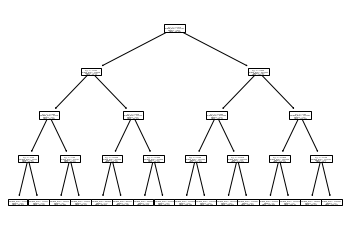

In [20]:
tree.plot_tree(reg) 